In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
df_games = pd.read_csv('C:\\Users\\frenz\\DAP Sanu\\GeneralEsportData.csv')
df_earnings = pd.read_csv('C:\\Users\\frenz\\DAP Sanu\\HistoricalEsportData.csv')

In [4]:
df_games.shape

(650, 8)

In [5]:
df_earnings.shape

(9244, 5)

In [6]:
df_games.head()

,Game,ReleaseDate,Genre,TotalEarnings,OfflineEarnings,PercentOffline,TotalPlayers,TotalTournaments
0,Age of Empires,1997,Strategy,510716.46,375857.63,0.735942,473,265
1,Age of Empires II,1999,Strategy,3253232.59,1139384.57,0.350232,1994,1613
2,Age of Empires III,2005,Strategy,115843.65,41800.00,0.360831,166,163
3,Age of Empires IV,2021,Strategy,994675.03,409117.93,0.411308,542,327
4,Age of Empires Online,2011,Strategy,9806.56,775.00,0.079029,44,50


In [7]:
df_earnings.head()

,Date,Game,Earnings,Players,Tournaments
0,1998-01-01,Command & Conquer: Red Alert,15000.0,8,1
1,1998-01-01,QuakeWorld,15000.0,8,1
2,1998-05-01,Quake II,15000.0,4,1
3,1998-05-01,Total Annihilation,15000.0,2,1
4,1998-05-01,QuakeWorld,300.0,3,1


In [8]:
print(df_games.info())
print(df_earnings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Game              650 non-null    object 
 1   ReleaseDate       650 non-null    int64  
 2   Genre             650 non-null    object 
 3   TotalEarnings     650 non-null    float64
 4   OfflineEarnings   650 non-null    float64
 5   PercentOffline    583 non-null    float64
 6   TotalPlayers      650 non-null    int64  
 7   TotalTournaments  650 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 40.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9244 entries, 0 to 9243
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         9244 non-null   object 
 1   Game         9244 non-null   object 
 2   Earnings     9244 non-null   float64
 3   Players      9244 non-null   int64  


In [9]:
df_games.describe()

,ReleaseDate,TotalEarnings,OfflineEarnings,PercentOffline,TotalPlayers,TotalTournaments
count,650.000000,6.500000e+02,6.500000e+02,583.000000,650.000000,650.000000
mean,2012.576923,2.527759e+06,1.774991e+06,0.659145,226.541538,94.078462
std,7.436703,1.758171e+07,1.377120e+07,0.412233,964.342887,479.807202
min,1981.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,2007.000000,1.000000e+03,0.000000e+00,0.219244,4.000000,1.000000
50%,2015.000000,3.636129e+04,1.500000e+04,0.906896,22.000000,5.000000
75%,2019.000000,2.563600e+05,1.715892e+05,1.000000,99.500000,27.750000
max,2023.000000,3.371080e+08,2.982906e+08,1.000000,16272.000000,7245.000000


In [10]:
df_earnings.describe()

,Earnings,Players,Tournaments
count,9.244000e+03,9244.000000,9244.000000
mean,1.796551e+05,59.721874,6.633600
std,1.017222e+06,130.098551,12.098553
min,0.000000e+00,0.000000,1.000000
25%,1.075000e+03,6.000000,1.000000
50%,1.026800e+04,16.000000,2.000000
75%,7.150557e+04,51.000000,6.000000
max,4.013865e+07,1719.000000,172.000000


In [11]:
df_earnings['Year'] = pd.DatetimeIndex(df_earnings["Date"]).year
print(df_earnings.head())

         Date                          Game  Earnings  Players  Tournaments  \
0  1998-01-01  Command & Conquer: Red Alert   15000.0        8            1   
1  1998-01-01                    QuakeWorld   15000.0        8            1   
2  1998-05-01                      Quake II   15000.0        4            1   
3  1998-05-01            Total Annihilation   15000.0        2            1   
4  1998-05-01                    QuakeWorld     300.0        3            1   

   Year  
0  1998  
1  1998  
2  1998  
3  1998  
4  1998  


In [12]:
df_esports = df_earnings.merge(df_games[['Game','Genre','ReleaseDate']], on = 'Game')
print(df_esports.head())

         Date                          Game  Earnings  Players  Tournaments  \
0  1998-01-01  Command & Conquer: Red Alert   15000.0        8            1   
1  1998-01-01                    QuakeWorld   15000.0        8            1   
2  1998-05-01                    QuakeWorld     300.0        3            1   
3  1998-11-01                    QuakeWorld   30000.0       17            1   
4  2001-07-01                    QuakeWorld   15000.0        8            1   

   Year                 Genre  ReleaseDate  
0  1998              Strategy         1996  
1  1998  First-Person Shooter         1996  
2  1998  First-Person Shooter         1996  
3  1998  First-Person Shooter         1996  
4  2001  First-Person Shooter         1996  


In [13]:
df_esports.Genre.unique()

array(['Strategy', 'First-Person Shooter', 'Fighting Game', 'Sports',
       'Racing', 'Multiplayer Online Battle Arena', 'Role-Playing Game',
       'Third-Person Shooter', 'Music / Rhythm Game',
       'Collectible Card Game', 'Puzzle Game', 'Battle Royale'],
      dtype=object)

In [14]:
df_esports.Genre.replace(
    {
        'First-Person Shooter' : 'FPS',
        'Multiplayer Online Battle Arena' : 'MOBA',
        'Role-Playing Game' : 'RPG',
        'Third-Person Shooter' : 'TPS'
    }, inplace = True
)

df_esports.Game.replace({"Counter-Strike: Global Offensive": 'CS:GO',
                         "PLAYERUNKNOWN'S BATTLEGROUNDS Mobile": 'PUBG Mobile',
                         "PLAYERUNKNOWN’S BATTLEGROUNDS": 'PUBG',
                         "Arena of Valor": 'AoV',
                         "League of Legends": 'LoL'
                         }, inplace = True)

In [15]:
df_esports.isna().sum()

Date           0
Game           0
Earnings       0
Players        0
Tournaments    0
Year           0
Genre          0
ReleaseDate    0
dtype: int64

In [16]:
df_esports.loc[df_esports.duplicated()]

,Date,Game,Earnings,Players,Tournaments,Year,Genre,ReleaseDate


In [17]:
df_esports = df_esports.loc[~df_esports.duplicated(subset=['Date','Game','Earnings'])].reset_index(drop=True).copy()

In [18]:
df_esports.shape

(9244, 8)

In [19]:
df_esports = df_esports.loc[(df_esports['Earnings'] > 0) & (df_esports['Players'] > 0)].copy()

In [20]:
topgames = df_esports.loc[df_esports.Earnings > 0].copy()
topgames = topgames.groupby(['Game', 'ReleaseDate', 'Genre'])['Earnings'].sum().reset_index()

topgames['Earnings'] = round(topgames['Earnings']/1000000)
topgames = topgames.sort_values('Earnings', ascending=False, ignore_index=True)

print(topgames.head(10))

                Game  ReleaseDate          Genre  Earnings
0             Dota 2         2013           MOBA     337.0
1           Fortnite         2017  Battle Royale     170.0
2              CS:GO         2012            FPS     162.0
3                LoL         2009           MOBA     105.0
4                AoV         2015           MOBA      86.0
5        PUBG Mobile         2017  Battle Royale      74.0
6               PUBG         2017  Battle Royale      57.0
7       StarCraft II         2010       Strategy      40.0
8  Rainbow Six Siege         2015            FPS      39.0
9          Overwatch         2016            FPS      35.0


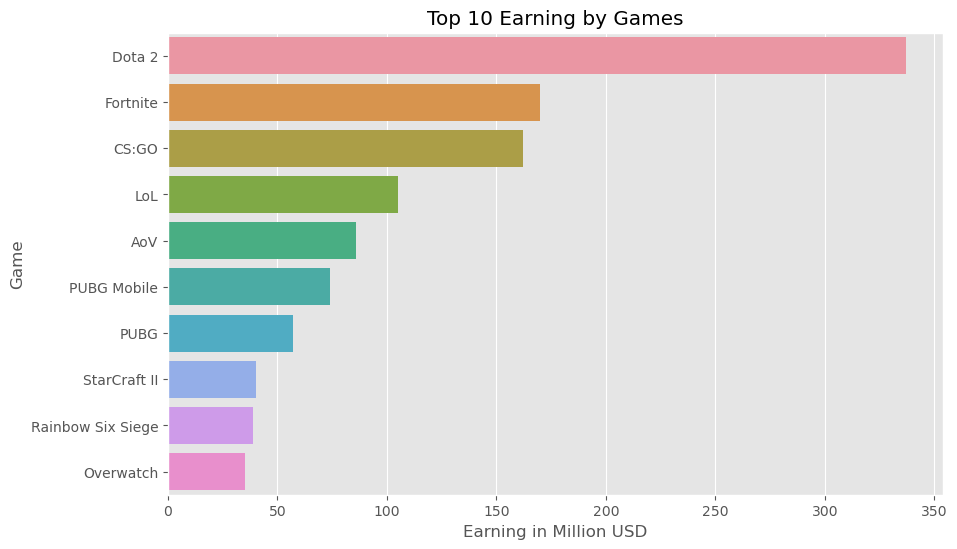

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'Earnings',
            y = 'Game',
            data = topgames.head(10),)
plt.xlabel('Earning in Million USD')
plt.title('Top 10 Earning by Games')
plt.show()

In [22]:
genre_counts = topgames.groupby('Genre')['Earnings'].sum()
sorted_genres = genre_counts.sort_values(ascending=False)
top_genres = sorted_genres[:3]
other_genres = sorted_genres[3:].sum()

mod_genre_counts = pd.concat([top_genres, pd.Series([other_genres], index=['Other'])])

print(mod_genre_counts)

MOBA             591.0
FPS              408.0
Battle Royale    339.0
Other            302.0
dtype: float64


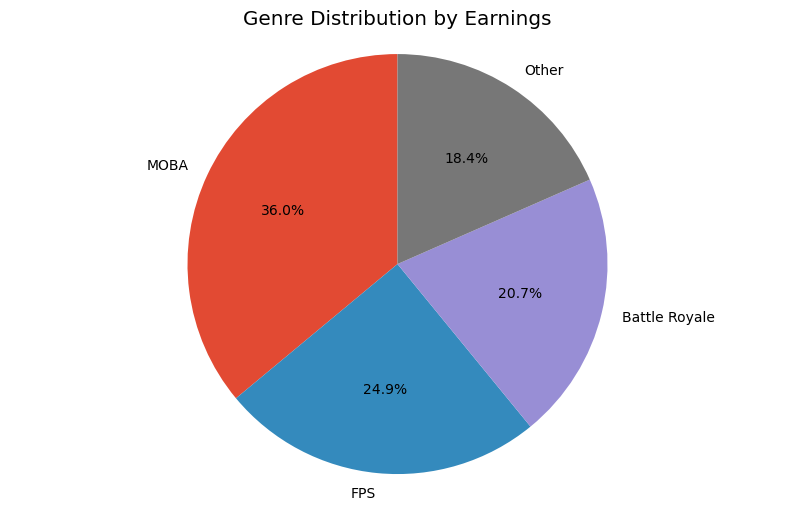

In [23]:
plt.figure(figsize=(10, 6))
plt.pie(mod_genre_counts, labels=mod_genre_counts.index, autopct='%.1f%%', startangle=90)
plt.axis('equal')
plt.title('Genre Distribution by Earnings')
plt.show()

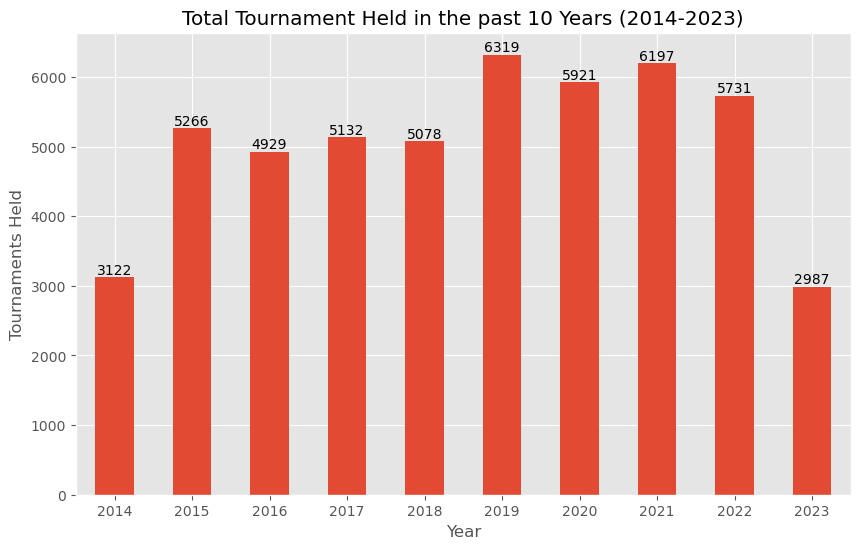

In [25]:
yearly_tournament_total = df_esports[(df_esports['Tournaments'] > 0) & 
                                     (df_esports['Year'] >= 2014) &
                                     (df_esports['Year'] <= 2023)].copy()


plt.figure(figsize=(10,6))
df_bar = yearly_tournament_total.groupby('Year')['Tournaments'].sum()
ax = df_bar.plot(kind = 'bar')


for idx, value in enumerate(df_bar):
    ax.text(idx, value + 1, str(value), ha='center', va='bottom')

plt.xticks(rotation=0)
plt.xlabel('Year')
plt.ylabel('Tournaments Held')
plt.title('Total Tournament Held in the past 10 Years (2014-2023)')
plt.show()

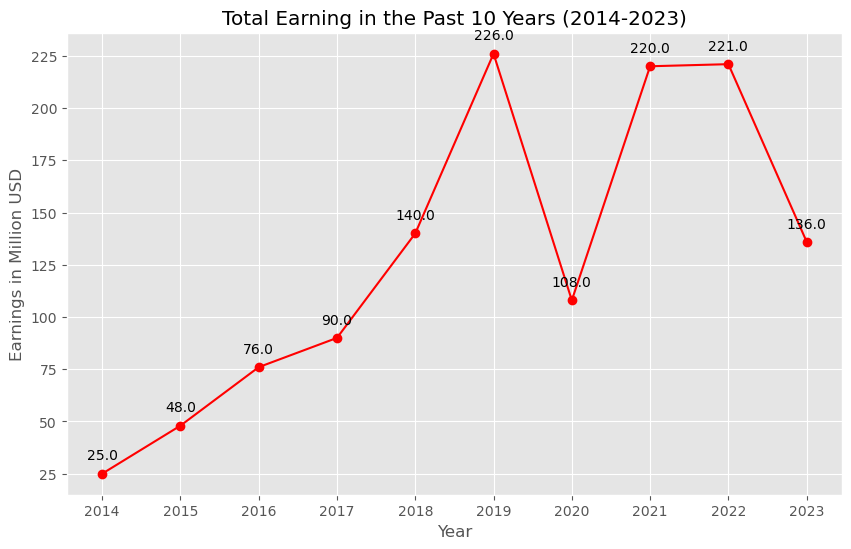

In [27]:
yearly_earnings = df_esports[(df_esports['Earnings'] > 0) &
                             (df_esports['Year'] >= 2014) &
                             (df_esports['Year'] <= 2023)].copy()

yearly_earnings['Earnings'] = round(yearly_earnings['Earnings']/1000000)
yearly_earnings.reset_index(drop=True, inplace=True)


df_line = yearly_earnings.groupby('Year')['Earnings'].sum()
plt.figure(figsize=(10,6))
df_line.plot(kind='line', marker='o', color='red')


for x, y in zip(df_line.index, df_line.values):
    plt.annotate(f'{y}', (x,y), textcoords='offset points', xytext=(0,10), ha='center')

plt.xticks(list(range(2014,2024)))
plt.xlabel('Year')
plt.ylabel('Earnings in Million USD')
plt.title('Total Earning in the Past 10 Years (2014-2023)')
plt.show()

<Figure size 1800x600 with 0 Axes>

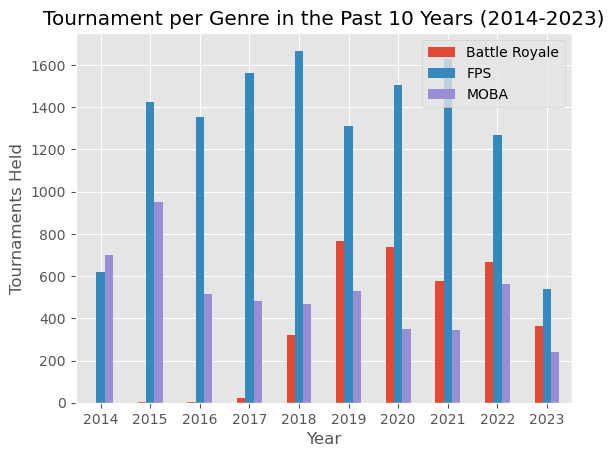

In [29]:
genre_yearly_tournament = df_esports[(df_esports['Tournaments'] > 0) & 
                                     (df_esports['Year'] >= 2014) &
                                     (df_esports['Year'] <= 2023) &
                                     (df_esports.Genre.isin(['MOBA', 'Battle Royale', 'FPS']))].copy()
genre_yearly_tournament = genre_yearly_tournament.groupby(['Genre', 'Year'])['Tournaments'].sum().reset_index()



pivot_table = genre_yearly_tournament.pivot_table(index='Year', columns='Genre', values='Tournaments', fill_value=0)


plt.figure(figsize=(18, 6))
pivot_table.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Tournaments Held')
plt.title('Tournament per Genre in the Past 10 Years (2014-2023)')
plt.legend()
plt.xticks(rotation=0)
plt.show()

In [30]:
print(pivot_table)

Genre  Battle Royale     FPS   MOBA
Year                               
2014             0.0   620.0  701.0
2015             2.0  1423.0  950.0
2016             2.0  1356.0  514.0
2017            22.0  1561.0  483.0
2018           323.0  1668.0  468.0
2019           766.0  1312.0  529.0
2020           736.0  1505.0  347.0
2021           579.0  1627.0  343.0
2022           665.0  1269.0  562.0
2023           363.0   540.0  240.0


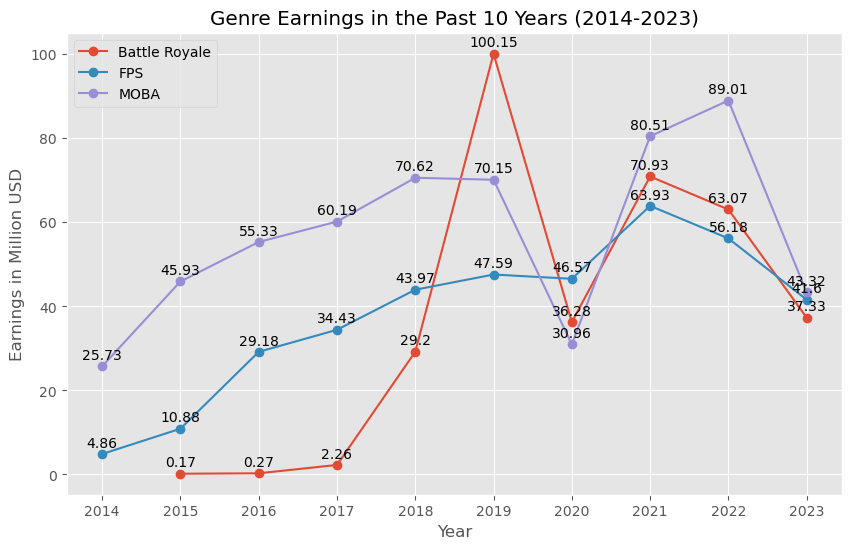

In [31]:
genre_yearly_earnings = df_esports.loc[(df_esports.Earnings > 0) &
                                       (df_esports.Year >= 2014) &
                                       (df_esports.Year <= 2023) &
                                       (df_esports.Genre.isin(['MOBA', 'Battle Royale', 'FPS']))].copy()
genre_yearly_earnings = genre_yearly_earnings.groupby(['Genre', 'Year'])['Earnings'].sum().reset_index()

genre_yearly_earnings['Earnings'] = (genre_yearly_earnings['Earnings']/1000000).round(2)
genre_yearly_earnings.reset_index(drop=True, inplace=True)
unique_genre_yearly_earnings = genre_yearly_earnings['Genre'].unique()

plt.figure(figsize=(10,6))  

for Genre in unique_genre_yearly_earnings:
    genre_data = genre_yearly_earnings[genre_yearly_earnings['Genre'] == Genre]
    plt.plot(genre_data['Year'], genre_data['Earnings'], label=Genre, marker='o')
    
    for x,y in zip(genre_data['Year'], genre_data['Earnings']):
        plt.annotate(f'{y}', (x,y), textcoords='offset points', xytext=(0,5), ha='center')

plt.xticks(list(range(2014,2024)))
plt.xlabel('Year')
plt.ylabel('Earnings in Million USD')
plt.title('Genre Earnings in the Past 10 Years (2014-2023)')
plt.legend()
plt.show()

In [32]:
top5earnings = topgames['Game'].head(5)
top5earnings

0      Dota 2
1    Fortnite
2       CS:GO
3         LoL
4         AoV
Name: Game, dtype: object

<Figure size 1000x600 with 0 Axes>

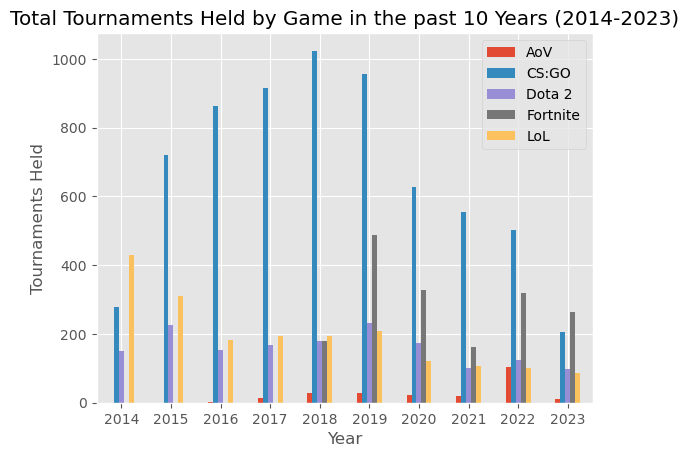

In [33]:
games_tourney = df_esports.groupby(['Game', 'Year'])['Tournaments'].sum().reset_index().copy()


topgames_df = df_esports[(df_esports['Game'].isin(top5earnings)) & (df_esports['Year'].between(2014,2023))]
pivot_table = topgames_df.pivot_table(index='Year', columns='Game', values='Tournaments', fill_value=0, aggfunc='sum')

plt.figure(figsize=(10,6))
pivot_table.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Tournaments Held')
plt.title('Total Tournaments Held by Game in the past 10 Years (2014-2023)')
plt.legend()
plt.xticks(rotation=0)
plt.show()

In [34]:
print(pivot_table)

Game  AoV  CS:GO  Dota 2  Fortnite  LoL
Year                                   
2014    0    279     150         0  429
2015    0    721     227         0  311
2016    2    863     153         0  182
2017   15    915     167         0  193
2018   29   1024     181       179  194
2019   28    955     232       487  210
2020   22    627     174       327  120
2021   20    555     100       163  107
2022  103    503     125       318  102
2023   11    206      98       263   86


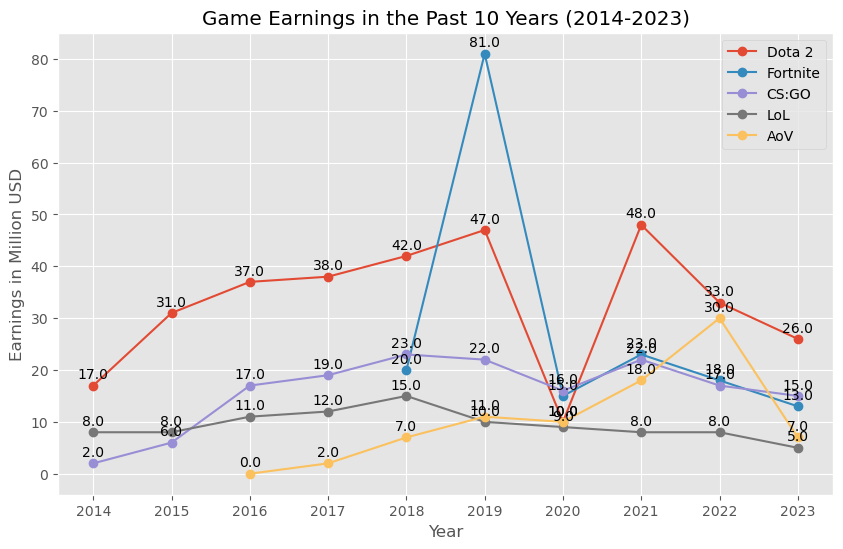

In [35]:
games_earning = df_esports.groupby(['Game','Year'])['Earnings'].sum().reset_index()
games_earning['Earnings'] = (games_earning['Earnings']/1000000).round()

plt.figure(figsize=(10,6))

for games in top5earnings:
    games_earning_by_years = games_earning[(games_earning['Game'] == games) & (games_earning['Year'].between(2014,2023))]
    plt.plot(games_earning_by_years['Year'], games_earning_by_years['Earnings'], label = games, marker='o')
    
    for x,y in zip(games_earning_by_years['Year'], games_earning_by_years['Earnings']):
        plt.annotate(f'{y}', (x,y), textcoords='offset points', xytext=(0,5), ha='center')

plt.xticks(list(range(2014,2024)))
plt.xlabel('Year')
plt.ylabel('Earnings in Million USD')
plt.title('Game Earnings in the Past 10 Years (2014-2023)')
plt.legend()
plt.show()